In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adamax
from keras.optimizers import Nadam
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from ann_visualizer.visualize import ann_viz
import graphviz

In [27]:
# Wczytaj dane z pliku CSV
data = pd.read_csv('diabetes.csv')
data['class'] = data['class'].map({'tested_positive': 1, 'tested_negative': 0})

In [28]:
# Przygotuj dane
X = data.drop('class', axis=1).values
y = data['class'].values

In [29]:
# Podziel dane na zbiory treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Funkcja binary_crossentropy jest używana jako funkcja straty (loss) w przypadku problemów klasyfikacji binarnej, gdzie wyjściowy neuron może przyjmować wartości z zakresu [0, 1], reprezentujące prawdopodobieństwo przynależności do jednej z dwóch klas.

Funkcja aktywacji sigmoid jest odpowiednia dla takiego przypadku, ponieważ jej wartości są ograniczone do przedziału (0, 1). Wartości te można interpretować jako prawdopodobieństwa przynależności do klasy pozytywnej (1) w przypadku klasyfikacji binarnej.

8/8 [==============================] - 0s 1ms/step
Accuracy:  0.6536796536796536
Confusion Matrix: 
 [[151   0]
 [ 80   0]]


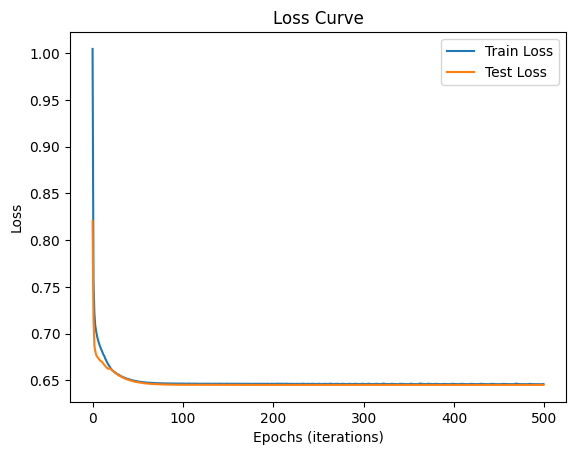

8/8 [==============================] - 0s 1ms/step
Accuracy:  0.6926406926406926
Confusion Matrix: 
 [[119  32]
 [ 39  41]]


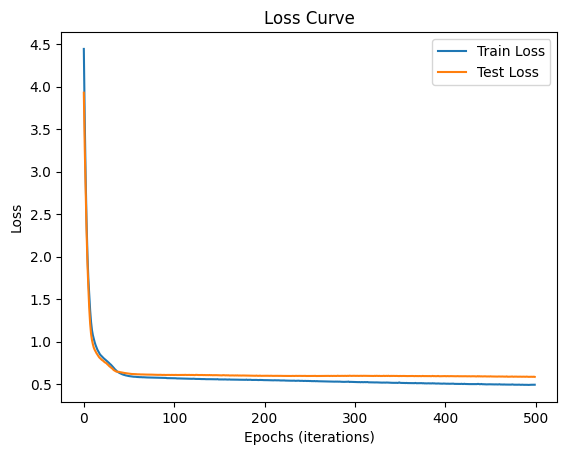

8/8 [==============================] - 0s 1ms/step
Accuracy:  0.7272727272727273
Confusion Matrix: 
 [[130  21]
 [ 42  38]]


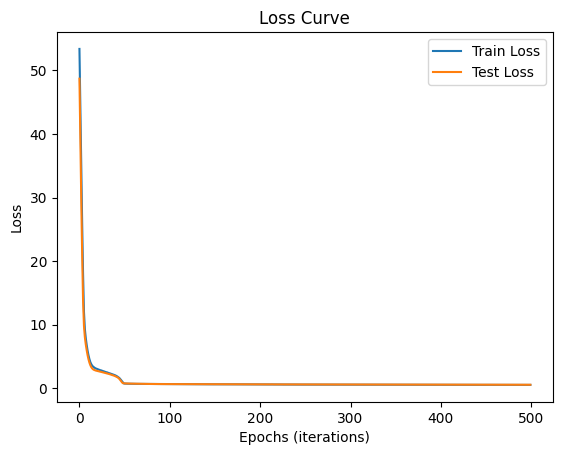

In [30]:
options = [[Adam(), 'relu'], [Adamax(), 'elu'], [Nadam(), 'swish']]

for i, option in enumerate(options):
    
    model = Sequential()
    model.add(Dense(6, activation=option[1], input_dim=X_train.shape[1]))
    model.add(Dense(3, activation=option[1]))
    model.add(Dense(1, activation='sigmoid')) # Używamy funkcji aktywacyjnej sigmoid, ponieważ mamy problem klasyfikacji binarnej
    
    model.compile(optimizer=option[0], loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)
    
    # Ewaluacja modelu
    y_pred = model.predict(X_test).round() # Zaokrągalmy wyniki do 0 lub 1, ponieważ mamy problem klasyfikacji binarnej
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Confusion Matrix: \n", confusion)
    
    if i == 0:
        ann_viz(model, title=f"Model visualization")
    
    # Wykres krzywej błędu
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs (iterations)')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Trenowanie powinno się przerwać w momencie, gdy krzywa błędu walidacji zaczyna wzrastać, podczas gdy krzywa błędu trenowania nadal maleje. Wskazuje to na przeuczenie. Jeśli obie krzywe błędu utrzymują się na wysokim poziomie, oznacza to niedouczenie.